  This was a very interesting assignment. I really enjoyed doing something that felt like an actual data scientist. My approach was to look at the data as a whole first and come up with my first impressions as to what a good feature to choose might be for impact on attendance. There were a few that jumped out at me at first, the flashy stuff like whether fireworks or bobbleheads were present. I looked at these based on the idea that previous promotional events may be a good predictor of future promotional events. However, it turns out that those promotions aren't as effective at predicting a good turn out as other variables. 
  
  To further explore the data I made some various plots to help determine which options were best. I included scatter plots as well as boxplots and a linear regression. Over all, the box plots were the most helpful at demonstrating the value of a given variable visually and provided me the most insight into my choices. Box plots very concisely demonstrate a range of levels to include highlighting median values and outliers. This project ended up being my love letter to box plots.
  
  The best options for strong turn out for a Dodgers game are to have your promotional event are day of the week, month, and opposing team. Theoretically, the best time to have this promotion would be on a Tuesday in either April or August and ideally a game against the Padres. These are the variables that most consistently have high rates of attendance. There are a couple of other features that look appealing that turn out to be more of an outlier that I had to filter out. The biggest example is at first I have been led to think that the Pirates were the best opponent choice, but in the case of the Pirates they only really had one over the top attendance day. The Padres, on the other hand, are consistently a high attendance opponent which makes a great deal of sense given the rivalry between the teams.
  
  



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv('C:\\Users\\jaybp\\Desktop\\dodgers.csv')

In [47]:
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [48]:
df.describe

<bound method NDFrame.describe of    month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0    APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1    APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2    APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3    APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4    APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
..   ...  ...     ...         ...      ...   ...     ...       ...  ..   ...   
76   SEP   29   40724    Saturday  Rockies    84  Cloudy     Night  NO    NO   
77   SEP   30   35607      Sunday  Rockies    95  Clear        Day  NO    NO   
78   OCT    1   33624      Monday   Giants    86  Clear      Night  NO    NO   
79   OCT    2   42473     Tuesday   Giants    83  Clear      Night  NO    NO   
80   OCT    3   34014   Wednesday   Giants    82  Cloudy     Night  NO    NO   

   fi

In [49]:
df.shape

(81, 12)

In [50]:
df.corr()

,day,attend,temp
day,1.000000,0.027093,-0.127612
attend,0.027093,1.000000,0.098951
temp,-0.127612,0.098951,1.000000


<AxesSubplot:title={'center':'attend'}, xlabel='month'>

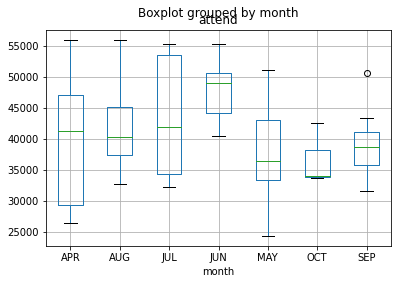

In [51]:
df.boxplot(column = 'attend', by = 'month')

<AxesSubplot:title={'center':'attend'}, xlabel='day_of_week'>

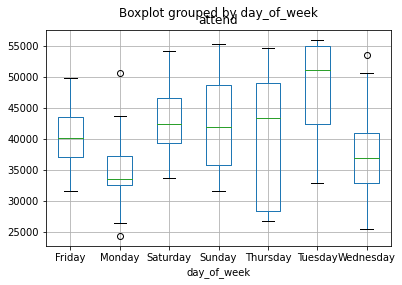

In [52]:
df.boxplot(column = 'attend', by = 'day_of_week')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'Angels'),
  Text(2, 0, 'Astros'),
  Text(3, 0, 'Braves'),
  Text(4, 0, 'Brewers'),
  Text(5, 0, 'Cardinals'),
  Text(6, 0, 'Cubs'),
  Text(7, 0, 'Giants'),
  Text(8, 0, 'Marlins'),
  Text(9, 0, 'Mets'),
  Text(10, 0, 'Nationals'),
  Text(11, 0, 'Padres'),
  Text(12, 0, 'Phillies'),
  Text(13, 0, 'Pirates'),
  Text(14, 0, 'Reds'),
  Text(15, 0, 'Rockies'),
  Text(16, 0, 'Snakes'),
  Text(17, 0, 'White Sox')])

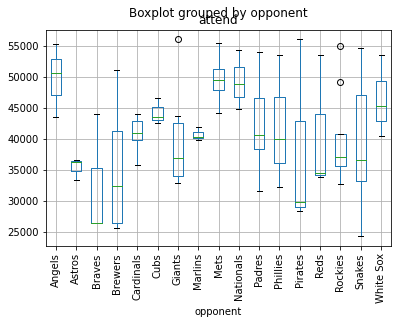

In [53]:
df.boxplot(column = 'attend', by = 'opponent')
plt.xticks(rotation ='vertical')



<function matplotlib.pyplot.show(close=None, block=None)>

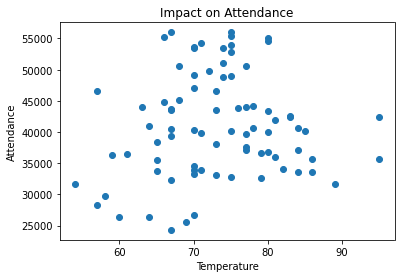

In [54]:
x = df['temp']
y = df['attend']
plt.title('Impact on Attendance')
plt.xlabel('Temperature')
plt.ylabel('Attendance')           
plt.scatter(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

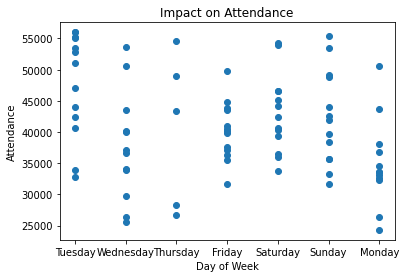

In [60]:
x = df['day_of_week']
y = df['attend']
plt.title('Impact on Attendance')
plt.xlabel('Day of Week')
plt.ylabel('Attendance')           
plt.scatter(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

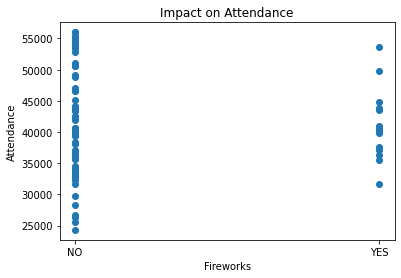

In [62]:
x = df['fireworks']
y = df['attend']
plt.title('Impact on Attendance')
plt.xlabel('Fireworks')
plt.ylabel('Attendance')           
plt.scatter(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

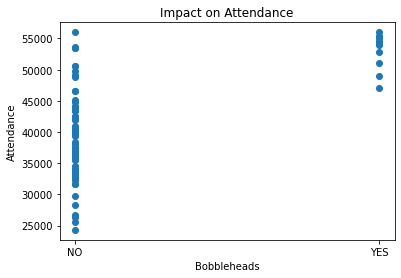

In [64]:
x = df['bobblehead']
y = df['attend']
plt.title('Impact on Attendance')
plt.xlabel('Bobbleheads')
plt.ylabel('Attendance')           
plt.scatter(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

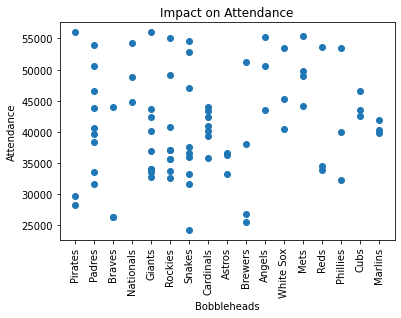

In [66]:
x = df['opponent']
y = df['attend']
plt.title('Impact on Attendance')
plt.xlabel('Bobbleheads')
plt.ylabel('Attendance')           
plt.scatter(x,y)
plt.xticks(rotation ='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

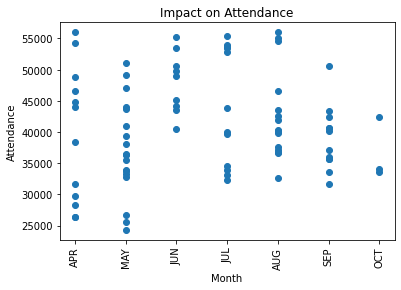

In [67]:
x = df['month']
y = df['attend']
plt.title('Impact on Attendance')
plt.xlabel('Month')
plt.ylabel('Attendance')           
plt.scatter(x,y)
plt.xticks(rotation ='vertical')
plt.show

In [55]:
#Getting a linear regression score for the data.
X = np.array(df['temp']).reshape(-1, 1)
y = np.array(df['attend']).reshape(-1, 1)
  
df.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

-0.021899705894442567


In [56]:
#Getting a linear regression score for the data.
X = np.array(df['day']).reshape(-1, 1)
y = np.array(df['attend']).reshape(-1, 1)
  
df.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

-0.02718855339702686
